In [1]:
import numpy as np
from numpy import genfromtxt

file_path_train = '/home/shrey/Desktop/eye_centre/eye_data/data/me.txt'
data = genfromtxt(file_path_train,delimiter=',')

In [2]:
data.shape

(50, 4)

In [3]:
X_or = data[:,[0,1]]
y1 = data[:,2]
y2 = data[:,3]

In [4]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2,include_bias=False)
X_poly = poly_features.fit_transform(X_or)
X_poly.shape

(50, 5)

In [7]:
from sklearn.linear_model import LinearRegression
lin_reg1 = LinearRegression()
lin_reg1.fit(X_poly,y1)
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly,y2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
file_path_test = '/home/shrey/Desktop/eye_centre/eye_data/data/me.txt'
data_test = genfromtxt(file_path_test,delimiter=',')
X_new = np.array((10,20))
X_new = np.expand_dims(X_new,axis=0)
#y1_new = data_test[:,2]
#y2_new = data_test[:,3]
X_new_poly = poly_features.fit_transform(X_new)

In [16]:
lin_reg1.predict(X_new_poly)

array([966.58539554])

In [17]:
diff1 = lin_reg1.predict(X_new_poly)-y1_new


NameError: name 'y1_new' is not defined

In [8]:
diff2 = lin_reg2.predict(X_new_poly)-y2_new


In [9]:
np.sqrt((diff1**2).sum()/len(list(diff1)))

6.432613832117571

In [10]:
np.sqrt((diff2**2).sum()/len(list(diff2)))

9.050961467826419

In [11]:
i1 = lin_reg1.intercept_
c1 = lin_reg1.coef_
i1,c1

(995.9921017321769,
 array([-6.92606227,  1.79862894,  0.00983724, -0.01425055,  0.01436931]))

In [12]:
i2 = lin_reg2.intercept_
c2 = lin_reg2.coef_
i2,c2

(-708.7137791485136,
 array([ 6.85456250e+00,  5.07109700e+00, -1.32173013e-02, -1.20750492e-03,
         2.62471464e-03]))

In [13]:
coef1 = np.append(i1,c1)
coef2 = np.append(i2,c2)

In [14]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

In [17]:
def plot(coef):
    n = coef.shape[0]
    t = np.ones((140,140))
    T = np.array([t,X,Y,X*X,X*Y,Y*Y])
    d = np.ones((n,140,140),dtype='float64')
    for i,c in enumerate(coef):
        d[i] = c*np.ones((140,140),dtype='float64')
    Z = np.multiply(d,T).sum(axis=0)
    ax.plot_surface(X,Y,Z,cmap='gray')

<IPython.core.display.Javascript object>


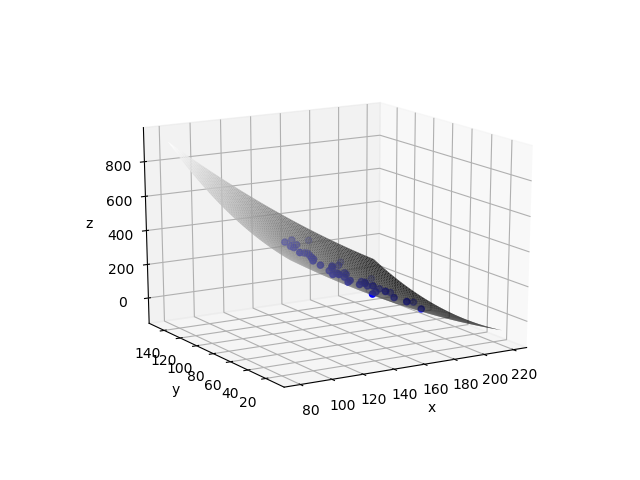

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_or[:,0],X_or[:,1],y1,c='b')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
x = np.arange(80,220,1)
y = np.arange(10,150,1)
X,Y = np.meshgrid(x,y)
plot(coef1)

<IPython.core.display.Javascript object>


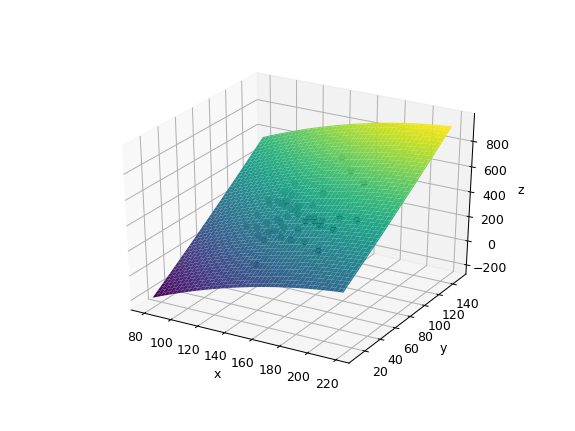

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_or[:,0],X_or[:,1],y2,c='k')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plot(coef2)